<a href="https://colab.research.google.com/github/pnn99/detector_fraude_LLM/blob/main/detector_de_fraude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download


In [1]:
# !pip install pandas
# !pip install numpy
# !pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [3]:
df_credit = pd.read_csv('creditcard.csv')
df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#verificação de tipos e valores nulos
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#verifica os tipos dos dados não fraude
df_nao_fraude = df_credit.Amount[df_credit.Class == 0]
df_nao_fraude.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [6]:
#verifica os tipos dos dados de fraude
df_fraude = df_credit.Amount[df_credit.Class == 1]
df_fraude.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [7]:
# Contagem das classes (fraude e não fraude)
df_credit.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
#Criação de um novo dataset para utilizar um undersampling para igualar a nossa base de dados
df_fraude = df_credit[df_credit.Class == 1]
df_nao_fraude = df_credit[df_credit.Class == 0]

df_undersampling = df_nao_fraude.sample(n=492)
df_undersampling

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
271491,164598.0,0.109381,0.979530,-0.496491,-0.721448,1.142572,-0.353013,0.882440,0.037528,-0.333528,...,-0.302649,-0.750529,0.051914,0.255329,-0.401617,0.111175,0.218936,0.072439,4.99,0
97839,66406.0,-1.909825,1.256160,0.433707,-0.810739,0.170353,-0.370122,0.435935,0.196471,0.457619,...,-0.294524,-0.553131,0.212798,-0.571305,-0.588600,-0.209698,-0.885707,-0.558383,8.92,0
110250,71739.0,-1.127375,1.095835,1.477134,0.974543,-0.616663,0.229068,-0.228991,0.676804,-0.480731,...,0.168626,0.494861,0.227316,0.206117,-0.730944,-0.475558,0.117121,0.160069,29.99,0
199695,133088.0,2.040481,-0.387621,-0.770498,0.028894,-0.103829,0.092221,-0.550168,-0.038097,0.934002,...,0.146786,0.549834,0.106106,0.116924,-0.199130,0.656129,-0.037198,-0.043303,25.00,0
73047,54952.0,1.262177,-0.064434,0.490606,-0.257875,-0.545871,-0.504382,-0.296825,-0.014474,0.112903,...,-0.099961,-0.297121,0.039994,0.074079,0.141054,0.906176,-0.073197,-0.003270,3.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242951,151728.0,2.032123,-0.392761,-0.496902,0.324944,-0.394286,-0.140368,-0.577226,-0.093114,1.120168,...,0.186149,0.832699,0.014158,-0.610218,-0.087167,0.666904,-0.012209,-0.051558,14.90,0
44408,41929.0,1.026607,0.018784,0.407345,1.251035,-0.312638,-0.352727,0.088633,-0.030526,0.053948,...,-0.001907,-0.155234,-0.035283,0.056181,0.386585,-0.426390,0.021731,0.036896,85.00,0
164022,116400.0,2.037139,-0.152051,-2.957717,-0.577064,2.607790,3.143214,-0.414773,0.783980,0.359715,...,-0.351370,-0.997776,0.362083,0.604908,-0.265143,0.219501,-0.039510,-0.042510,3.57,0
215050,139916.0,1.149689,-1.657953,-1.585162,0.608635,-0.226744,0.284867,0.318826,-0.069082,0.426500,...,0.262458,-0.155126,-0.204062,0.271679,-0.321269,0.157150,-0.128529,0.017402,455.50,0


In [9]:
#concaternar dos dataframes
df_concatenado = pd.concat([df_undersampling, df_fraude], axis=0)
df_concatenado

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
271491,164598.0,0.109381,0.979530,-0.496491,-0.721448,1.142572,-0.353013,0.882440,0.037528,-0.333528,...,-0.302649,-0.750529,0.051914,0.255329,-0.401617,0.111175,0.218936,0.072439,4.99,0
97839,66406.0,-1.909825,1.256160,0.433707,-0.810739,0.170353,-0.370122,0.435935,0.196471,0.457619,...,-0.294524,-0.553131,0.212798,-0.571305,-0.588600,-0.209698,-0.885707,-0.558383,8.92,0
110250,71739.0,-1.127375,1.095835,1.477134,0.974543,-0.616663,0.229068,-0.228991,0.676804,-0.480731,...,0.168626,0.494861,0.227316,0.206117,-0.730944,-0.475558,0.117121,0.160069,29.99,0
199695,133088.0,2.040481,-0.387621,-0.770498,0.028894,-0.103829,0.092221,-0.550168,-0.038097,0.934002,...,0.146786,0.549834,0.106106,0.116924,-0.199130,0.656129,-0.037198,-0.043303,25.00,0
73047,54952.0,1.262177,-0.064434,0.490606,-0.257875,-0.545871,-0.504382,-0.296825,-0.014474,0.112903,...,-0.099961,-0.297121,0.039994,0.074079,0.141054,0.906176,-0.073197,-0.003270,3.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [10]:
#ajustar o Index
df_concatenado.reset_index(drop=True, inplace=True)
df_concatenado

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,164598.0,0.109381,0.979530,-0.496491,-0.721448,1.142572,-0.353013,0.882440,0.037528,-0.333528,...,-0.302649,-0.750529,0.051914,0.255329,-0.401617,0.111175,0.218936,0.072439,4.99,0
1,66406.0,-1.909825,1.256160,0.433707,-0.810739,0.170353,-0.370122,0.435935,0.196471,0.457619,...,-0.294524,-0.553131,0.212798,-0.571305,-0.588600,-0.209698,-0.885707,-0.558383,8.92,0
2,71739.0,-1.127375,1.095835,1.477134,0.974543,-0.616663,0.229068,-0.228991,0.676804,-0.480731,...,0.168626,0.494861,0.227316,0.206117,-0.730944,-0.475558,0.117121,0.160069,29.99,0
3,133088.0,2.040481,-0.387621,-0.770498,0.028894,-0.103829,0.092221,-0.550168,-0.038097,0.934002,...,0.146786,0.549834,0.106106,0.116924,-0.199130,0.656129,-0.037198,-0.043303,25.00,0
4,54952.0,1.262177,-0.064434,0.490606,-0.257875,-0.545871,-0.504382,-0.296825,-0.014474,0.112903,...,-0.099961,-0.297121,0.039994,0.074079,0.141054,0.906176,-0.073197,-0.003270,3.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
980,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
981,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
982,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [11]:
#retirar dados para validação
df_val_nao_fraude = df_concatenado.head(5)
df_val_nao_fraude

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,164598.0,0.109381,0.979530,-0.496491,-0.721448,1.142572,-0.353013,0.882440,0.037528,-0.333528,...,-0.302649,-0.750529,0.051914,0.255329,-0.401617,0.111175,0.218936,0.072439,4.99,0
1,66406.0,-1.909825,1.256160,0.433707,-0.810739,0.170353,-0.370122,0.435935,0.196471,0.457619,...,-0.294524,-0.553131,0.212798,-0.571305,-0.588600,-0.209698,-0.885707,-0.558383,8.92,0
2,71739.0,-1.127375,1.095835,1.477134,0.974543,-0.616663,0.229068,-0.228991,0.676804,-0.480731,...,0.168626,0.494861,0.227316,0.206117,-0.730944,-0.475558,0.117121,0.160069,29.99,0
3,133088.0,2.040481,-0.387621,-0.770498,0.028894,-0.103829,0.092221,-0.550168,-0.038097,0.934002,...,0.146786,0.549834,0.106106,0.116924,-0.199130,0.656129,-0.037198,-0.043303,25.00,0
4,54952.0,1.262177,-0.064434,0.490606,-0.257875,-0.545871,-0.504382,-0.296825,-0.014474,0.112903,...,-0.099961,-0.297121,0.039994,0.074079,0.141054,0.906176,-0.073197,-0.003270,3.00,0


In [12]:
df_val_fraude = df_concatenado.tail(5)
df_val_fraude

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
979,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
980,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
981,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
982,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
983,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [13]:
df_concatenado.drop(df_concatenado.head(5).index, inplace=True)
df_concatenado.drop(df_concatenado.tail(5).index, inplace=True)
df_concatenado

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
5,78433.0,0.225994,-1.746057,-0.990608,0.368660,-0.676179,-0.743019,0.948874,-0.276682,-0.193036,...,0.299779,-0.494770,-0.608525,0.080334,0.302531,1.019287,-0.234203,0.070813,564.00,0
6,45131.0,1.031120,-0.824386,0.705774,0.499071,-1.084310,0.167789,-0.623322,0.050993,-0.815941,...,-0.126593,-0.004750,-0.228006,0.005512,0.519694,-0.235208,0.055075,0.044482,136.00,0
7,39714.0,-0.496922,0.751722,1.639869,1.423204,0.501763,0.529396,1.342292,-0.643048,-0.268445,...,-0.014312,0.652977,-0.260121,0.045571,-0.095701,-0.152509,-0.666705,-0.590232,58.00,0
8,151081.0,2.041619,-0.103121,-1.175985,0.224638,0.078059,-0.703875,0.081561,-0.172844,0.289436,...,-0.257383,-0.637847,0.286970,-0.333396,-0.282717,0.197957,-0.074388,-0.073121,1.98,0
9,150849.0,-2.431718,-0.647940,-2.722590,-0.909162,-2.797594,0.996144,4.353803,-0.293052,-2.634843,...,-0.145705,-0.085966,-0.304859,-0.890300,1.463128,1.294627,0.052522,-0.578004,950.96,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,165981.0,-5.766879,-8.402154,0.056543,6.950983,9.880564,-5.773192,-5.748879,0.721743,-1.076274,...,0.880395,-0.130436,2.241471,0.665346,-1.890041,-0.120803,0.073269,0.583799,0.00,1
975,166028.0,-0.956390,2.361594,-3.171195,1.970759,0.474761,-1.902598,-0.055178,0.277831,-1.745854,...,0.473211,0.719400,0.122458,-0.255650,-0.619259,-0.484280,0.683535,0.443299,39.90,1
976,166831.0,-2.027135,-1.131890,-1.135194,1.086963,-0.010547,0.423797,3.790880,-1.155595,-0.063434,...,-0.315105,0.575520,0.490842,0.756502,-0.142685,-0.602777,0.508712,-0.091646,634.30,1
977,166883.0,2.091900,-0.757459,-1.192258,-0.755458,-0.620324,-0.322077,-1.082511,0.117200,-0.140927,...,0.288253,0.831939,0.142007,0.592615,-0.196143,-0.136676,0.020182,-0.015470,19.95,1


In [14]:
#concatenar o dataframe de validação
df_val_total = pd.concat([df_val_nao_fraude, df_val_fraude], axis=0)
df_val_total.reset_index(inplace=True)

df_val_total_real = df_val_total.Class
df_val_total = df_val_total.drop(['index','Time','Class'], axis=1)
df_val_total

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.109381,0.979530,-0.496491,-0.721448,1.142572,-0.353013,0.882440,0.037528,-0.333528,-0.674083,...,0.066849,-0.302649,-0.750529,0.051914,0.255329,-0.401617,0.111175,0.218936,0.072439,4.99
1,-1.909825,1.256160,0.433707,-0.810739,0.170353,-0.370122,0.435935,0.196471,0.457619,0.845681,...,-0.266419,-0.294524,-0.553131,0.212798,-0.571305,-0.588600,-0.209698,-0.885707,-0.558383,8.92
2,-1.127375,1.095835,1.477134,0.974543,-0.616663,0.229068,-0.228991,0.676804,-0.480731,0.133430,...,-0.048491,0.168626,0.494861,0.227316,0.206117,-0.730944,-0.475558,0.117121,0.160069,29.99
3,2.040481,-0.387621,-0.770498,0.028894,-0.103829,0.092221,-0.550168,-0.038097,0.934002,0.012296,...,-0.017823,0.146786,0.549834,0.106106,0.116924,-0.199130,0.656129,-0.037198,-0.043303,25.00
4,1.262177,-0.064434,0.490606,-0.257875,-0.545871,-0.504382,-0.296825,-0.014474,0.112903,-0.052516,...,-0.022905,-0.099961,-0.297121,0.039994,0.074079,0.141054,0.906176,-0.073197,-0.003270,3.00
5,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
6,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
7,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
8,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00
9,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,...,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53


In [15]:
#verificar a distribuição dos dados fraude/não fraude
df_concatenado.Class.value_counts()

Class
0    487
1    487
Name: count, dtype: int64

In [16]:
#separar labels e features
X = df_concatenado.drop(['Time','Class'], axis=1)
Y = df_concatenado['Class']

In [17]:
print(X, Y)

           V1        V2        V3        V4        V5        V6        V7  \
5    0.225994 -1.746057 -0.990608  0.368660 -0.676179 -0.743019  0.948874   
6    1.031120 -0.824386  0.705774  0.499071 -1.084310  0.167789 -0.623322   
7   -0.496922  0.751722  1.639869  1.423204  0.501763  0.529396  1.342292   
8    2.041619 -0.103121 -1.175985  0.224638  0.078059 -0.703875  0.081561   
9   -2.431718 -0.647940 -2.722590 -0.909162 -2.797594  0.996144  4.353803   
..        ...       ...       ...       ...       ...       ...       ...   
974 -5.766879 -8.402154  0.056543  6.950983  9.880564 -5.773192 -5.748879   
975 -0.956390  2.361594 -3.171195  1.970759  0.474761 -1.902598 -0.055178   
976 -2.027135 -1.131890 -1.135194  1.086963 -0.010547  0.423797  3.790880   
977  2.091900 -0.757459 -1.192258 -0.755458 -0.620324 -0.322077 -1.082511   
978 -1.374424  2.793185 -4.346572  2.400731 -1.688433  0.111136 -0.922038   

           V8        V9       V10  ...       V20       V21       V22  \
5  

In [18]:
#separar entre dados de treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state = 42)

In [19]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# ---------------------------------------------------------------------------------
# PASSO 1: Definir os modelos de base (Nível 0 - Os "Especialistas")
# ---------------------------------------------------------------------------------
# Criamos uma lista de tuplas com o nome e o objeto de cada modelo.
base_models = [
    ('logistic_regression', LogisticRegression(max_iter=1000, random_state=42)),
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('gradient_boosting', GradientBoostingClassifier(random_state=42))
]

# ---------------------------------------------------------------------------------
# PASSO 2: Definir o Metaclassificador (Nível 1 - O "Gerente")
# ---------------------------------------------------------------------------------
# Usaremos uma Regressão Logística para combinar as previsões dos especialistas.
meta_classifier = LogisticRegression(random_state=42)

# ---------------------------------------------------------------------------------
# PASSO 3: Criar o Stacking Classifier
# ---------------------------------------------------------------------------------
# Juntamos tudo no StackingClassifier.
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_classifier,
    cv=5
)

# ---------------------------------------------------------------------------------
# PASSO 4: Treinar e Avaliar o modelo Stacking
# ---------------------------------------------------------------------------------
print("--- Treinando o StackingClassifier ---")
stacking_model.fit(x_train, y_train)
y_pred_stacking = stacking_model.predict(x_test)
acc_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Acurácia do StackingClassifier: {acc_stacking * 100:.2f}%\\n")
print("Relatório de Classificação do StackingClassifier:")
print(classification_report(y_test, y_pred_stacking))


# ---------------------------------------------------------------------------------
# PASSO 5: Treinar e Avaliar cada modelo de base para comparação
# ---------------------------------------------------------------------------------
print("\\n--- Acurácia dos Modelos de Base (Individuais) ---")
# Criamos um dicionário para guardar os resultados para o gráfico depois
model_accuracies = {}

for name, model in base_models:
    model.fit(x_train, y_train)
    y_pred_base = model.predict(x_test)
    acc_base = accuracy_score(y_test, y_pred_base)
    model_accuracies[name] = acc_base # Guarda a acurácia
    print(f"Acurácia do modelo '{name}': {acc_base * 100:.2f}%")

model_accuracies['stacking'] = acc_stacking

--- Treinando o StackingClassifier ---
Acurácia do StackingClassifier: 94.87%\n
Relatório de Classificação do StackingClassifier:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        98
           1       0.98      0.92      0.95        97

    accuracy                           0.95       195
   macro avg       0.95      0.95      0.95       195
weighted avg       0.95      0.95      0.95       195

\n--- Acurácia dos Modelos de Base (Individuais) ---
Acurácia do modelo 'logistic_regression': 94.36%
Acurácia do modelo 'decision_tree': 92.31%
Acurácia do modelo 'random_forest': 94.87%
Acurácia do modelo 'svc': 80.51%
Acurácia do modelo 'gradient_boosting': 93.33%


In [20]:
# --- Validação Comparativa (1ª Rodada - Modelos Padrão) ---

# 1. Criar o DataFrame para os resultados desta rodada
df_validacao_rodada1 = pd.DataFrame({'Real': df_val_total_real})

# 2. Reinstanciar e treinar os modelos com parâmetros padrão
#    para garantir que estamos usando as versões não otimizadas.

# Lista dos modelos de base padrão
base_models_padrao = [
    ('logistic_regression', LogisticRegression(max_iter=1000, random_state=42)),
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('gradient_boosting', GradientBoostingClassifier(random_state=42))
]

# Treinando cada modelo individualmente e fazendo a previsão
print("--- Gerando previsões para os modelos padrão individuais ---")
for name, model in base_models_padrao:
    model.fit(x_train, y_train)
    df_validacao_rodada1[f'Prev ({name})'] = model.predict(df_val_total)

# 3. Treinar o StackingClassifier com os modelos padrão e fazer a previsão
print("--- Gerando previsões para o StackingClassifier padrão ---")
stacking_model_padrao = StackingClassifier(
    estimators=base_models_padrao,
    final_estimator=LogisticRegression(random_state=42),
    cv=5,
    n_jobs=-1
)
stacking_model_padrao.fit(x_train, y_train)
df_validacao_rodada1['Prev (STACKING PADRÃO)'] = stacking_model_padrao.predict(df_val_total)

colunas_ordenadas = [
    'Real',
    'Prev (logistic_regression)',
    'Prev (random_forest)',
    'Prev (svc)',
    'Prev (gradient_boosting)',
    'Prev (STACKING PADRÃO)',
    'Prev (decision_tree)'
]
df_validacao_rodada1 = df_validacao_rodada1[colunas_ordenadas]

print("\n--- Painel de Validação (1ª Rodada - Modelos Padrão) ---")
df_validacao_rodada1

--- Gerando previsões para os modelos padrão individuais ---
--- Gerando previsões para o StackingClassifier padrão ---

--- Painel de Validação (1ª Rodada - Modelos Padrão) ---


,Real,Prev (logistic_regression),Prev (random_forest),Prev (svc),Prev (gradient_boosting),Prev (STACKING PADRÃO),Prev (decision_tree)
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
5,1,1,1,1,1,1,1
6,1,1,1,0,1,1,1
7,1,1,1,0,1,1,1
8,1,1,1,1,1,1,1
9,1,0,0,0,0,0,1


\n==================================================
INICIANDO ANÁLISE VISUAL DA 1ª RODADA (MODELOS PADRÃO)
==================================================\n


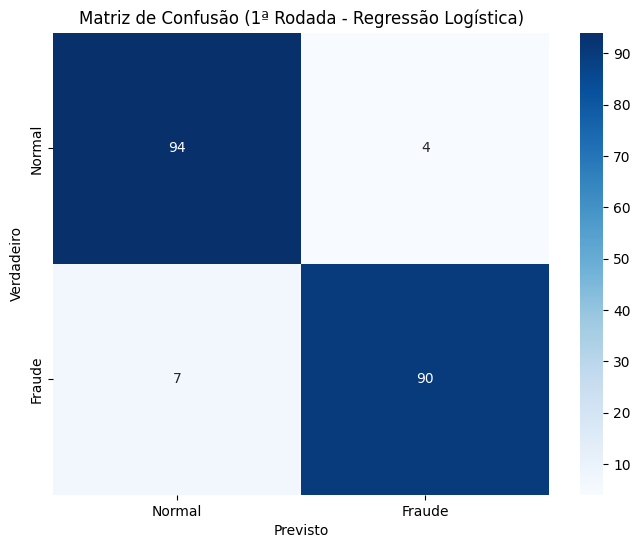

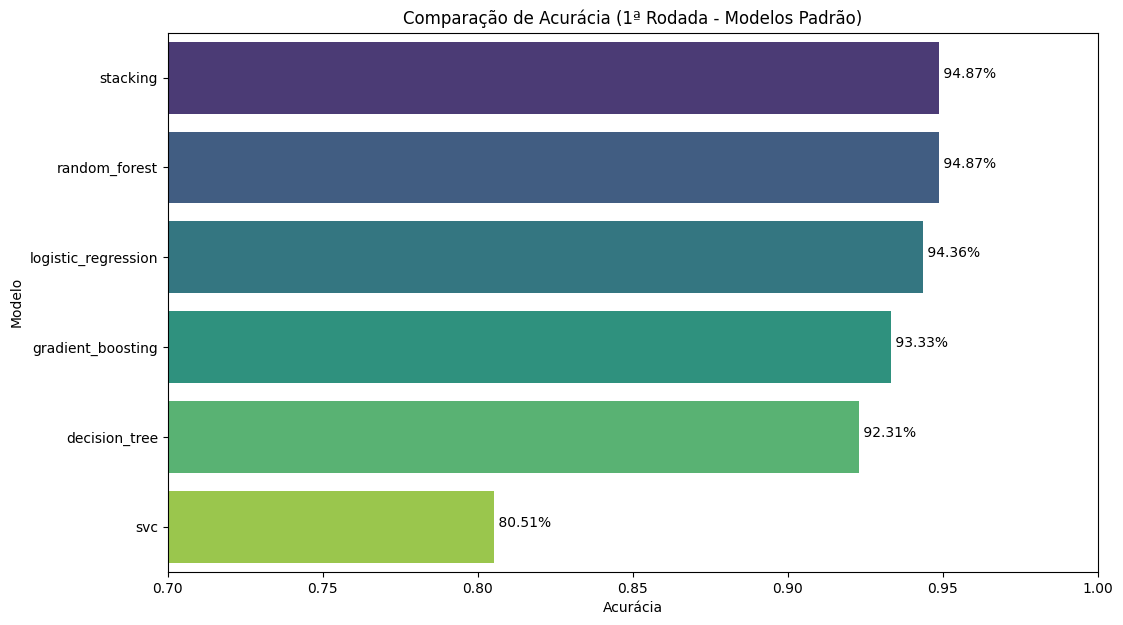

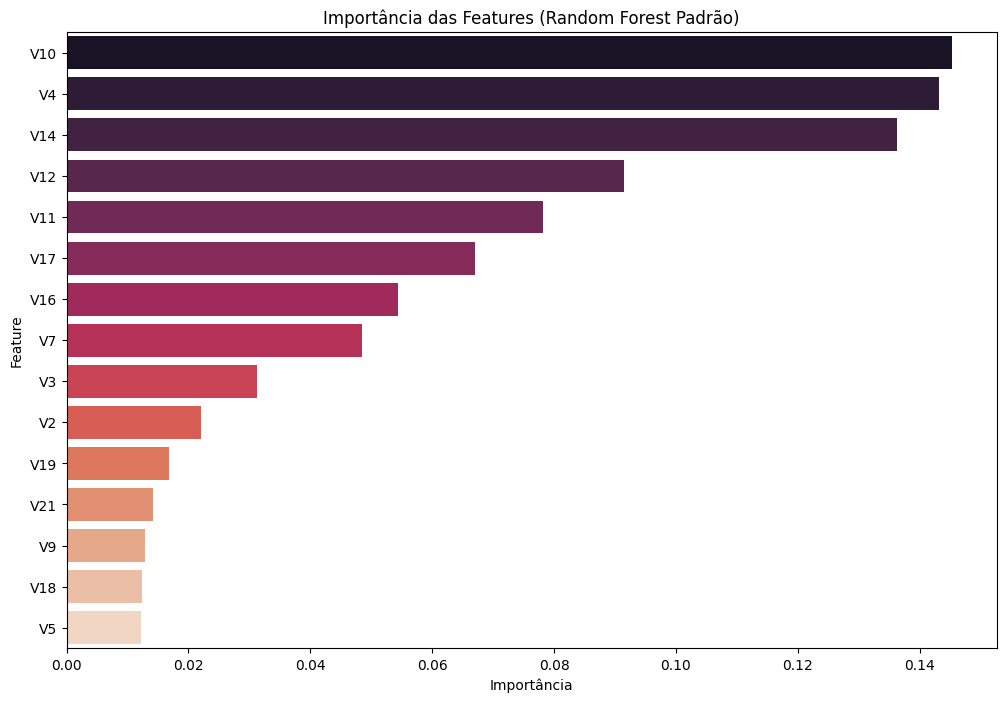

In [21]:
# --- GRÁFICOS E ANÁLISES DA 1ª RODADA (MODELOS PADRÃO) ---

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

print("\\n" + "="*50)
print("INICIANDO ANÁLISE VISUAL DA 1ª RODADA (MODELOS PADRÃO)")
print("="*50 + "\\n")


# --- Gráfico 1: Matriz de Confusão (Regressão Logística Padrão) ---
best_model_round1 = LogisticRegression(max_iter=1000, random_state=42)
best_model_round1.fit(x_train, y_train)
y_pred_round1 = best_model_round1.predict(x_test)

cm_round1 = confusion_matrix(y_test, y_pred_round1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_round1, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraude'], yticklabels=['Normal', 'Fraude'])
plt.title('Matriz de Confusão (1ª Rodada - Regressão Logística)')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.savefig('confusion_matrix_round1.png')
plt.show()


# --- Gráfico 2: Comparação de Acurácia dos Modelos (Padrão) ---

# Usando o dicionário 'model_accuracies' que foi criado na célula anterior
df_accuracies_round1 = pd.DataFrame(list(model_accuracies.items()), columns=['Modelo', 'Acurácia']).sort_values('Acurácia', ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x='Acurácia', y='Modelo', data=df_accuracies_round1, palette='viridis', orient='h', hue='Modelo', legend=False)
plt.title('Comparação de Acurácia (1ª Rodada - Modelos Padrão)')
plt.xlabel('Acurácia')
plt.ylabel('Modelo')
plt.xlim(0.7, 1.0) # Ajuste para dar destaque
for index, value in enumerate(df_accuracies_round1['Acurácia']):
    plt.text(value, index, f' {value*100:.2f}%')
plt.savefig('accuracy_comparison_round1.png')
plt.show()

# --- Gráfico 3: Importância das Features (Random Forest Padrão) ---

# Usando o modelo RandomForest com parâmetros padrão treinado na célula anterior
rf_model_padrao = RandomForestClassifier(random_state=42)
rf_model_padrao.fit(x_train, y_train)

feature_importances_padrao = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model_padrao.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances_padrao.head(15), palette='rocket', orient='h', hue='feature', legend=False)
plt.title('Importância das Features (Random Forest Padrão)')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.savefig('feature_importance_round1.png')
plt.show()


In [22]:
from sklearn.model_selection import GridSearchCV

# --- PASSO 1: Otimização do RandomForestClassifier ---

print("--- Iniciando a Otimização para o RandomForestClassifier ---")

# Definindo o "cardápio" de parâmetros que o GridSearchCV vai testar
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Número de árvores
    'max_depth': [10, 20, 30],         # Profundidade máxima
    'criterion': ['gini', 'entropy']     # Critério de divisão
}

# Configurando o GridSearchCV
# cv=5 significa que usaremos validação cruzada de 5 folds
# n_jobs=-1 usa todos os processadores disponíveis para acelerar o processo
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Rodando a busca pelos melhores parâmetros
grid_search_rf.fit(x_train, y_train)

print("\n--- Otimização do RandomForestClassifier Concluída! ---")
print(f"Melhores parâmetros encontrados: {grid_search_rf.best_params_}")

# Guardando o melhor modelo encontrado
best_rf = grid_search_rf.best_estimator_

# --- PASSO 2: Otimização do SVC ---

print("\n--- Iniciando a Otimização para o SVC ---")

# "Cardápio" de parâmetros para o SVC
param_grid_svc = {
    'C': [0.1, 1, 10],            # Parâmetro de regularização
    'gamma': ['scale', 'auto'],     # Coeficiente do kernel
    'kernel': ['rbf']               # Vamos focar no kernel RBF que é muito poderoso
}

# Configurando o GridSearchCV para o SVC
grid_search_svc = GridSearchCV(
    estimator=SVC(probability=True, random_state=42),
    param_grid=param_grid_svc,
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Rodando a busca
grid_search_svc.fit(x_train, y_train)

print("\n--- Otimização do SVC Concluída! ---")
print(f"Melhores parâmetros encontrados: {grid_search_svc.best_params_}")

# Guardando o melhor modelo SVC
best_svc = grid_search_svc.best_estimator_

--- Iniciando a Otimização para o RandomForestClassifier ---
Fitting 5 folds for each of 18 candidates, totalling 90 fits

--- Otimização do RandomForestClassifier Concluída! ---
Melhores parâmetros encontrados: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200}

--- Iniciando a Otimização para o SVC ---
Fitting 5 folds for each of 6 candidates, totalling 30 fits

--- Otimização do SVC Concluída! ---
Melhores parâmetros encontrados: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [23]:

print("--- Montando o StackingClassifier com os melhores parâmetros ---")

# 1. Definir a lista de modelos de base
base_models_optimized = [
    ('logistic_regression', LogisticRegression(max_iter=1000, random_state=42)),
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('random_forest_otimizado', best_rf), 
    ('svc_otimizado', best_svc),
    ('gradient_boosting', GradientBoostingClassifier(random_state=42))
]

# 2. Definir o Metaclassificador
meta_classifier_final = LogisticRegression(random_state=42)

# 3. Criar o Stacking Classifier
stacking_model_optimized = StackingClassifier(
    estimators=base_models_optimized,
    final_estimator=meta_classifier_final,
    cv=5,
    n_jobs=-1
)

# 4. Treinar e Avaliar o modelo final
print("--- Treinando o StackingClassifier OTIMIZADO ---")
stacking_model_optimized.fit(x_train, y_train)
y_pred_stacking_optimized = stacking_model_optimized.predict(x_test)
acc_stacking_optimized = accuracy_score(y_test, y_pred_stacking_optimized)

print("\n--- RESULTADO FINAL ---")
print(f"Acurácia do StackingClassifier OTIMIZADO: {acc_stacking_optimized * 100:.2f}%\n")
print("Relatório de Classificação do StackingClassifier OTIMIZADO:")
print(classification_report(y_test, y_pred_stacking_optimized))

print("\n--- Verificando a melhoria do SVC Otimizado (Individual) ---")
svc_optimized_solo = SVC(C=10, gamma='scale', kernel='rbf', random_state=42)
svc_optimized_solo.fit(x_train, y_train)
acc_svc_optimized = accuracy_score(y_test, svc_optimized_solo.predict(x_test))
print(f"Acurácia do SVC OTIMIZADO: {acc_svc_optimized * 100:.2f}%")

--- Montando o StackingClassifier com os melhores parâmetros ---
--- Treinando o StackingClassifier OTIMIZADO ---

--- RESULTADO FINAL ---
Acurácia do StackingClassifier OTIMIZADO: 94.36%

Relatório de Classificação do StackingClassifier OTIMIZADO:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        98
           1       0.97      0.92      0.94        97

    accuracy                           0.94       195
   macro avg       0.94      0.94      0.94       195
weighted avg       0.94      0.94      0.94       195


--- Verificando a melhoria do SVC Otimizado (Individual) ---
Acurácia do SVC OTIMIZADO: 89.74%


In [24]:
# --- Validação Final Comparativa ---

# 1. Vamos criar um DataFrame para armazenar os resultados.
# A primeira coluna é o valor real, que já separamos no início.
df_validacao = pd.DataFrame({'Real': df_val_total_real})


# 2. Agora, vamos adicionar a previsão de cada um dos nossos modelos como uma nova coluna.
#    Usaremos os modelos já treinados nas etapas anteriores.

# Modelo de Regressão Logística (o primeiro que treinamos)
lr_final = LogisticRegression(max_iter=1000, random_state=42)
lr_final.fit(x_train, y_train)
df_validacao['Prev (Logística)'] = lr_final.predict(df_val_total)

df_validacao['Prev (Decision Tree)'] = DecisionTreeClassifier(random_state=42).fit(x_train, y_train).predict(df_val_total)

# Melhor RandomForest (encontrado pelo GridSearchCV)
# A variável 'best_rf' já foi treinada pelo GridSearchCV
df_validacao['Prev (RandomForest Otimizado)'] = best_rf.predict(df_val_total)

# Melhor SVC (encontrado pelo GridSearchCV)
# A variável 'best_svc' já foi treinada pelo GridSearchCV
df_validacao['Prev (SVC Otimizado)'] = best_svc.predict(df_val_total)

# Modelo Stacking Otimizado (nosso modelo final)
df_validacao['Prev (STACKING OTIMIZADO)'] = stacking_model_optimized.predict(df_val_total)


# 3. Exibir o DataFrame comparativo
print("--- Painel de Validação Final ---")
print("Comparando o valor Real com a previsão de cada modelo:")
df_validacao

--- Painel de Validação Final ---
Comparando o valor Real com a previsão de cada modelo:


,Real,Prev (Logística),Prev (Decision Tree),Prev (RandomForest Otimizado),Prev (SVC Otimizado),Prev (STACKING OTIMIZADO)
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,1,1,1,1,1,1
6,1,1,1,1,1,1
7,1,1,1,1,1,1
8,1,1,1,1,1,1
9,1,0,1,0,0,0


\n==================================================
INICIANDO ANÁLISE VISUAL FINAL (MODELOS OTIMIZADOS)
==================================================\n


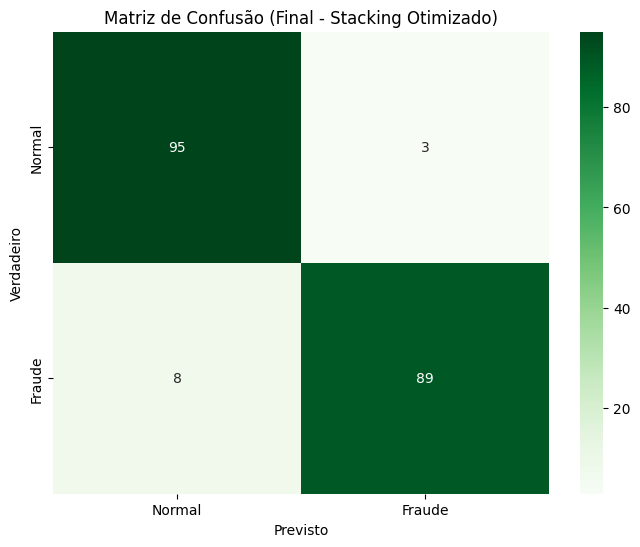

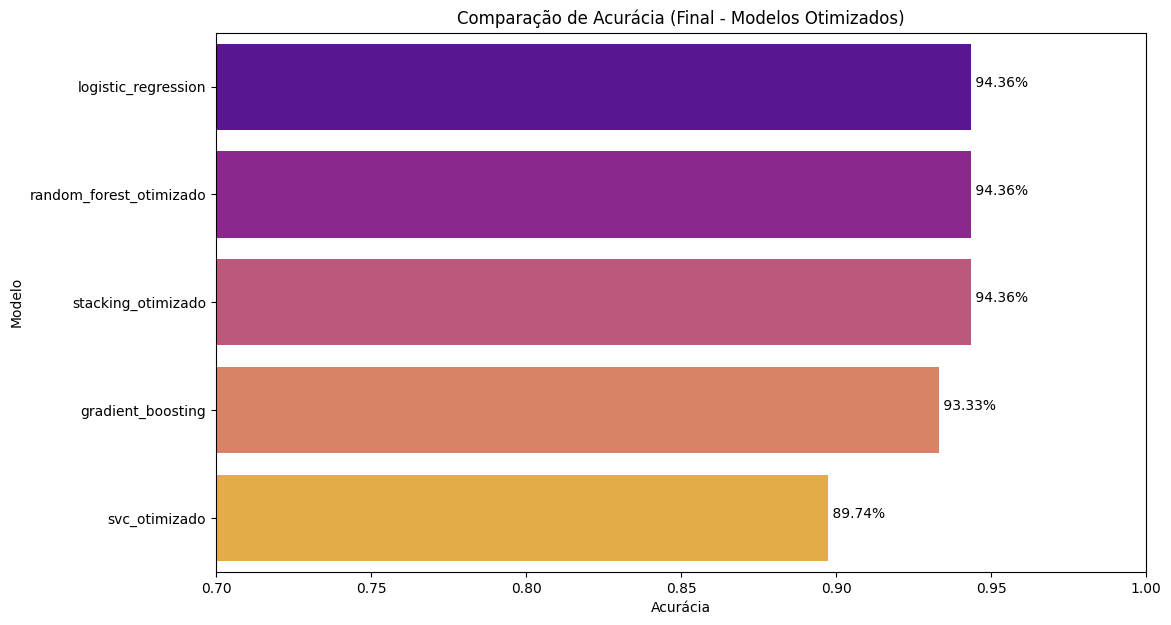

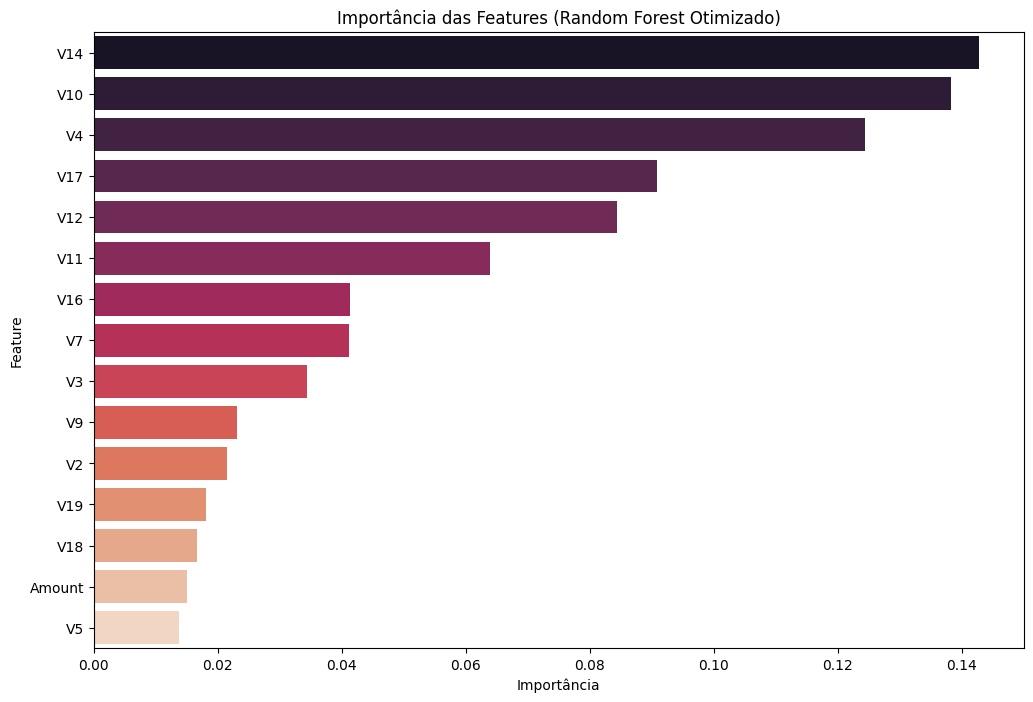

In [25]:
# --- GRÁFICOS E ANÁLISES FINAIS (APÓS OTIMIZAÇÃO) ---

print("\\n" + "="*50)
print("INICIANDO ANÁLISE VISUAL FINAL (MODELOS OTIMIZADOS)")
print("="*50 + "\\n")

# --- Gráfico 1: Matriz de Confusão (Modelo Final: Stacking Otimizado) ---

cm_final = confusion_matrix(y_test, y_pred_stacking_optimized)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Greens', xticklabels=['Normal', 'Fraude'], yticklabels=['Normal', 'Fraude'])
plt.title('Matriz de Confusão (Final - Stacking Otimizado)')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.savefig('confusion_matrix_final.png')
plt.show()

# --- Gráfico 2: Comparação de Acurácia dos Modelos (Otimizados) ---

# Precisamos primeiro coletar a acurácia dos modelos otimizados
model_accuracies_optimized = {}

# Reavaliando os modelos individuais com os melhores parâmetros
lr_final = LogisticRegression(max_iter=1000, random_state=42).fit(x_train, y_train)
model_accuracies_optimized['logistic_regression'] = accuracy_score(y_test, lr_final.predict(x_test))

# 'best_rf' e 'best_svc' já foram treinados pelo GridSearchCV
model_accuracies_optimized['random_forest_otimizado'] = accuracy_score(y_test, best_rf.predict(x_test))
model_accuracies_optimized['svc_otimizado'] = accuracy_score(y_test, best_svc.predict(x_test))

gb_final = GradientBoostingClassifier(random_state=42).fit(x_train, y_train)
model_accuracies_optimized['gradient_boosting'] = accuracy_score(y_test, gb_final.predict(x_test))

# Adicionando a acurácia do stacking otimizado
model_accuracies_optimized['stacking_otimizado'] = acc_stacking_optimized

# Criando o DataFrame e o gráfico
df_accuracies_final = pd.DataFrame(list(model_accuracies_optimized.items()), columns=['Modelo', 'Acurácia']).sort_values('Acurácia', ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x='Acurácia', y='Modelo', data=df_accuracies_final, palette='plasma', orient='h',hue='Modelo', legend=False)
plt.title('Comparação de Acurácia (Final - Modelos Otimizados)')
plt.xlabel('Acurácia')
plt.ylabel('Modelo')
plt.xlim(0.7, 1.0)
for index, value in enumerate(df_accuracies_final['Acurácia']):
    plt.text(value, index, f' {value*100:.2f}%')
plt.savefig('accuracy_comparison_final.png')
plt.show()


# --- Gráfico 3: Importância das Features (Random Forest Otimizado) ---

feature_importances_otimizado = pd.DataFrame({
    'feature': X.columns,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances_otimizado.head(15), palette='rocket', orient='h', hue='feature', legend=False)
plt.title('Importância das Features (Random Forest Otimizado)')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.savefig('feature_importance_final.png')
plt.show()